# 1. Install Necessary Libaries

In [47]:
%pip install nltk wordcloud afinn camel-tools ar-wordcloud textblob scikit-learn

Note: you may need to restart the kernel to use updated packages.


# 2. Import necessary libraries

In [48]:
#utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#text processing & sentiment analysis
import re
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from afinn import Afinn
import unicodedata as ud
import camel_tools as ct
from nltk.stem.isri import ISRIStemmer
from ar_wordcloud import ArabicWordCloud
import time
import unicodedata as ud
#model
from textblob import TextBlob
from camel_tools.sentiment import SentimentAnalyzer
from sklearn.metrics import classification_report, accuracy_score

In [49]:
with open('arabic_stopwords.txt', 'r') as file:
    stopwords = file.read()
# print(stopwords)

# 3. Preprocessing Function

In [50]:
def preprocess_ar(text, stopwords):
    processedText = []
    
    # Create Lemmatizer and Stemmer
    st = ISRIStemmer()
    
    for t in text:
        # Remove characters that are not Arabic letters ('Lo') or numbers ('Nd')
        t = ''.join(c for c in t if ud.category(c) == 'Lo' or ud.category(c) == 'Nd' or c == ' ')
        
        commentwords = ''
        for word in t.split():
            # Checking if the word is a stopword
            if word not in stopwords:
                if len(word) > 1:
                    # Stem the word using ISRIStemmer
                    word = st.suf32(word)
                    commentwords += (word + ' ')
        
        processedText.append(commentwords.strip())
    
    return processedText

# 4. Loading Stopwords

In [51]:
# Load stopwords from a file
with open('arabic_stopwords.txt', 'r') as file:
    stopwords = file.read().splitlines()  # Split stopwords into a list

# 5. Defining the List of Files to Process

In [52]:
# List of files to process
file_paths = [
    "/media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stemming_Removing_Diacritics_Part/content_Without_Stem.txt",
    "/media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stemming_Removing_Diacritics_Part/content_Without_Stem_punc.txt",
    "/media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stemming_Removing_Diacritics_Part/content_With_Stem_Light.txt",
    "/media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stemming_Removing_Diacritics_Part/content_With_Stem_Light_punc.txt",
    "/media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stemming_Removing_Diacritics_Part/content_With_Stem_Snowball.txt",
    "/media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stemming_Removing_Diacritics_Part/content_With_Stem_Snowball_punc.txt"
]


# 6. Processing Each File and Saving the Output

In [53]:
# Iterate over each file, process it, and save the output
for file_path in file_paths:
    # Load the Arabic text from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.readlines()  # Read the text file line by line
    
    # Preprocess the text to remove stopwords
    processed_text = preprocess_ar(text, stopwords)
    
    # Define the base name and create the output file name in the current directory
    base_name = os.path.splitext(os.path.basename(file_path))[0]  # Get the file name without the directory and extension
    output_file_name = f"{base_name}_stop_words_removed.txt"
    
    # Create the full path for the output file in the current directory
    output_file_path = os.path.join(os.getcwd(), output_file_name)
    
    # Save the processed text to the new file
    with open(output_file_path, 'w', encoding='utf-8') as outfile:
        for line in processed_text:
            outfile.write(line + '\n')  # Write each processed line to the file
    
    print(f"Processed file saved to {output_file_path}")


Processed file saved to /media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stop_Words_Removal_parts/content_Without_Stem_stop_words_removed.txt
Processed file saved to /media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stop_Words_Removal_parts/content_Without_Stem_punc_stop_words_removed.txt
Processed file saved to /media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stop_Words_Removal_parts/content_With_Stem_Light_stop_words_removed.txt
Processed file saved to /media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stop_Words_Removal_parts/content_With_Stem_Light_punc_stop_words_removed.txt
Processed file saved to /media/ahmed/Work/Research/Enhancing-Arabic-Text-Analysis-with-Sphere-Based-Embeddings/Stop_Words_Removal_parts/content_With_Stem_Snowball_stop_words_removed.txt
Processed file saved to /media/ahmed/Work/Research/Enhancing-Arabic-Text-Analy

# 7. Plotting Stopwords cloud

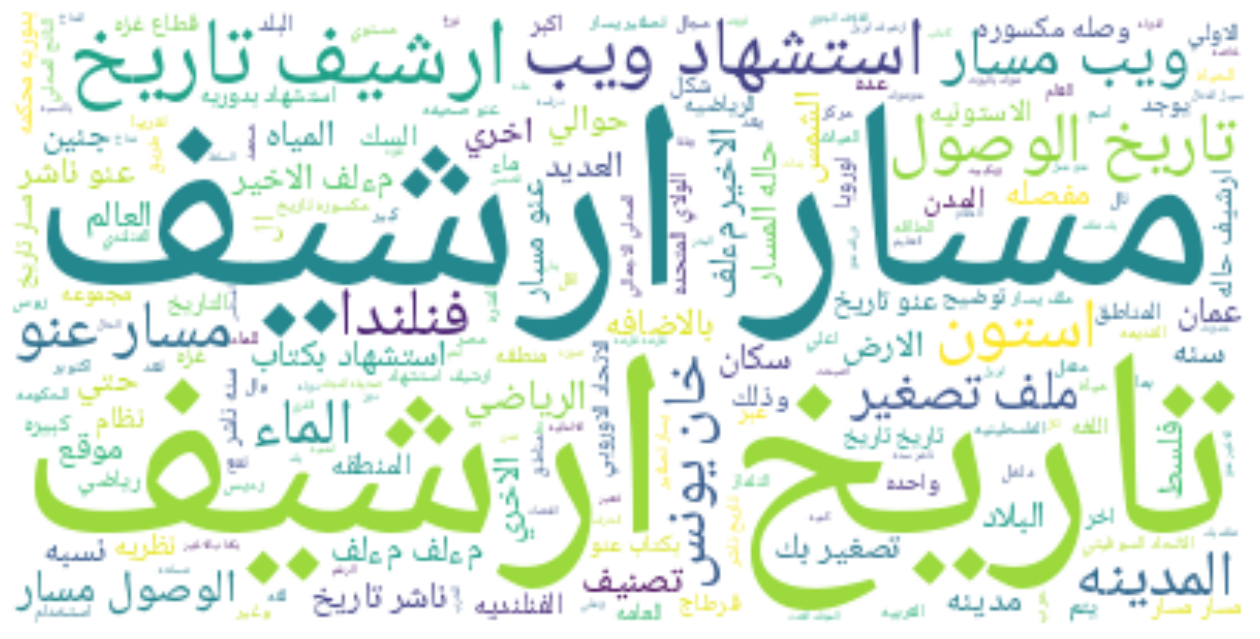

In [54]:
# Concatenate the list of processed text into a single string
text_for_wordcloud = ' '.join(processed_text)

# Initialize the ArabicWordCloud object
awc = ArabicWordCloud(background_color="white")

# Create the word cloud from the text
wc_ar = awc.generate(text_for_wordcloud)

# Plot the word cloud
plt.figure(figsize=(16, 16))
plt.imshow(wc_ar, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


# 8. Saving the Processed Text to a File

In [55]:
# Save the processed text to a new file
with open("processed_text.txt", 'w', encoding='utf-8') as outfile:
    for line in processed_text:
        outfile.write(line + '\n')  # Write each processed line to the file